In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv")

In [7]:
data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [4]:
data.isnull().any()

Customer ID              False
Purchase Date            False
Product Category         False
Product Price            False
Quantity                 False
Total Purchase Amount    False
Payment Method           False
Customer Age             False
Returns                   True
Customer Name            False
Age                      False
Gender                   False
Churn                    False
dtype: bool

In [5]:
data.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [6]:
median=data['Returns'].median()
print(median)

1.0


In [7]:
data1 = data.fillna(median)

In [8]:
data.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

# 1.What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?

In [9]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv",usecols=['Purchase Date','Total Purchase Amount'])

In [11]:
result = data.groupby('Purchase Date').sum()
result.sort_values(by='Total Purchase Amount', ascending=False)

,Total Purchase Amount
Purchase Date,
2023-09-05 09:42:43,9996
2021-12-23 23:04:51,9976
2020-07-08 23:36:29,9870
2020-05-08 21:02:41,9808
2022-04-05 17:11:15,9626
...,...
2020-03-13 02:18:59,102
2020-05-12 15:20:04,102
2023-04-24 18:19:21,101


- there is no seasonal trends 

# 2.Which product categories generate the highest revenue and which are the most popular based on quantity purchased?

In [13]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv")

In [15]:
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0


In [17]:
data['Product Category'].value_counts()

Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64

- Electronics is generating highest revenue 

In [22]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv",usecols=['Product Category','Quantity'])

In [26]:
result = data.groupby('Product Category').sum()
result.sort_values(by='Quantity', ascending=False)

,Quantity
Product Category,
Clothing,188688
Home,188077
Electronics,187861
Books,186608


- The most popular based on quantity is Clothing
- after that it is Home 

# 3.What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?

In [51]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv")

In [53]:
data['Payment Method'].value_counts()

Payment Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64

- Most popular payment method is Credit card

<Axes: xlabel='Payment Method', ylabel='Total Purchase Amount'>

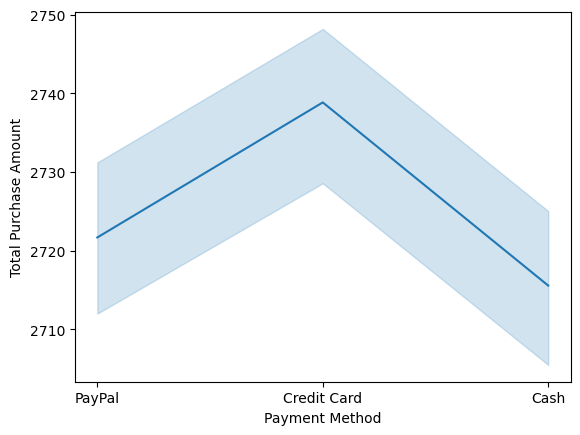

In [80]:
sns.lineplot(data=data, x='Payment Method', y="Total Purchase Amount")

- using credit card the most payments are done
- there no much difference in different payment methods
- but the most popular is Credit card 

# 4.Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?

In [28]:
data=pd.read_csv(r"ecommerce_customer_data_large.csv",usecols=['Total Purchase Amount','Customer ID','Customer Name'])

In [30]:
data.head(1)

,Customer ID,Total Purchase Amount,Customer Name
0,44605,2427,John Rivera


In [32]:
data.groupby('Total Purchase Amount').sum()

,Customer ID,Customer Name
Total Purchase Amount,,
100,60040,Ashley HallThomas Cole
101,43189,Laura Rios
102,43270,Lisa JacksonLori Yu
103,51,Colleen Pace
104,29079,James Welch
...,...,...
5345,58828,Kevin RomanMary Johnson
5346,461,Theresa Hunt
5348,25539,Jeremiah Barnes


- As you can see The top 5 constumers by Total Purchase Amount based on Customer ID and Customer Name are:
1. Gary White customer ID is 259 and the total amount is 5350
2. David PatrickKyle JacksonJoan Carson , customer ID is 79161 and the total amount is 5349
3. Jeremiah Barnes , customer ID is 25539 and the total amount is 5348
4. Theresa Hunt , customer ID 461 and the total amount is 5346
5. Kevin RomanMary Johnson,customer ID is 58828 and the total amount is 5345

